## Распознование изображении из набора данных MNIST, CIFAR-10 и базы автомобилеей с помощью свёрточных нейронных сетей

#### Импорт библиотек для работы всего ноутбука

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os

%matplotlib inline

# Распознавание изображений из набора данных MNIST 

**Подготовка данных**

In [9]:
# Загружаем mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

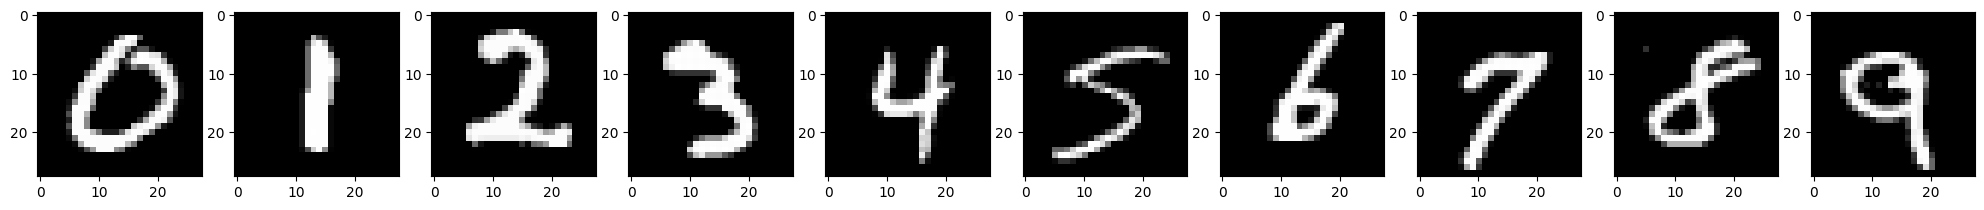

In [11]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize = (25, 3)) # Создаем полотно из 10 графиков
for i in range(10): # Проходим по классам от 0 до 9
    label_indexes = np.where(y_train == i)[0] # Получаем полный список из индексов положений класса i в y_train
    index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
    img = x_train[index] # Выбираем из x_train нужное изображение 
    axs[i].imshow(Image.fromarray(img), cmap = 'gray') # Отображаем изображение i-ым графиком

plt.show() # Показываем изображение

In [12]:
# Превращаем y_train и y_test в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы сверточная сеть понимала, что это черно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28 ,28, 1)

In [15]:
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
# Задаем batch_size
batch_size = 128

# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
# Второй сверточный слой
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
# Первый слой подвыборки
